

*   마할라노비스 거리
  > 표준화 여부에 관계없이 **accuracy=0.75**


*   유클리드 거리
>  표준화 X -> **K = 32, accuracy=0.75**<br/> 표준화O -> **K = 18, accuracy=0.76**








In [18]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hyojooo","key":"bdf9b251e6a817ffe6e43216e3e28a32"}'}

In [19]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kagg/e.json

!kaggle compatitions list

chmod: cannot access '/root/.kaggle/kagg/e.json': No such file or directory
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'compatitions' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [21]:
ls -1ha kaggle.json

kaggle.json


In [22]:
!kaggle competitions download -c logistic-classification-diabetes-knn

submission_form.csv: Skipping, found more recently modified local copy (use --force to force download)
test_data.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!ls

'kaggle (1).json'   sample_data		  test_data.csv
 kaggle.json	    submission_form.csv   train.csv


In [24]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test_data.csv')
submission=pd.read_csv('submission_form.csv')
train

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0.0
1,1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1.0
2,2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0.0
3,3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1.0
4,4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0.0
...,...,...,...,...,...,...,...,...,...,...
704,704,0.000000,0.346734,-0.049180,-0.595960,-0.312057,-0.213115,-0.766012,0.000000,1.0
705,705,-0.647059,0.025126,0.213115,0.000000,0.000000,-0.120715,-0.963279,-0.633333,1.0
706,706,-0.176471,0.879397,-0.180328,-0.333333,-0.073286,0.010432,-0.361230,-0.566667,0.0
707,707,-0.647059,0.738693,0.278689,-0.212121,-0.562648,0.007452,-0.238258,-0.666667,0.0


In [ ]:
print(train.shape)

train_X=train.iloc[:,1:9]
train_y=train.iloc[:,9]
X_test=test.iloc[:,1:9]

(709, 10)


### train data와 validation data
test data label 값이 없어서 validation data를 만들어 모델 성능 검증

In [28]:
#test label이 없어서 validation set 구성
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(train_X,train_y,test_size=0.3,random_state=1,stratify=train_y)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(496, 8)
(213, 8)
(496,)
(213,)


### 표준화

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_val_std=sc.transform(X_val)

### 모델
#### 마할라노비스 거리 사용(val accuracy=0.75) -> 표준화하나 안하나 accuracy 변화X

In [34]:
#표준화X
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn_mahal=KNeighborsClassifier(metric='mahalanobis', metric_params={'V':np.cov(X_train, rowvar=False)})

knn_mahal.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 0.15091087,  0.01875945,  0.01652536,  0.01924369,  0.02658696,
         0.01432646,  0.00588298,  0.04085977],
       [ 0.01875945,  0.09831939,  0.0144293 ,  0.01704722,  0.0278139 ,
         0.01507162,  0.01710313,  0.02354307],
       [ 0.01652536,  0.0144293 ,  0.04145291,  0.00937696,  0.0114442 ,
         0.00922722,  0.0003117...
         0.00169173, -0.00335761,  0.03374127],
       [ 0.01432646,  0.01507162,  0.00922722,  0.01702109,  0.00169173,
         0.03976373,  0.01053604, -0.00799226],
       [ 0.00588298,  0.01710313,  0.00031177, -0.00190118, -0.00335761,
         0.01053604,  0.09065817,  0.00443838],
       [ 0.04085977,  0.02354307,  0.01644667,  0.01357795,  0.03374127,
        -0.00799226,  0.00443838,  0.16765333]])},
                     n_jobs=None, n_neighbors=5, p=2, weights='uniform')

In [35]:
y_train_pred=knn_mahal.predict(X_train)
y_val_pred=knn_mahal.predict(X_val)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_val, y_val_pred))

0.8245967741935484
0.755868544600939


In [36]:
#표준화O
knn_mahal.fit(X_train_std, y_train)
y_train_pred=knn_mahal.predict(X_train_std)
y_val_pred=knn_mahal.predict(X_val_std)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_val, y_val_pred))

0.7862903225806451
0.7511737089201878


#### 유클리드 거리 사용 (K=5)


*   표준화X -> accuracy=0.62
*   표준화O -> accuracy=0.74


In [37]:
knn=KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train,y_train)
y_train_pred=knn_mahal.predict(X_train)
y_val_pred=knn_mahal.predict(X_val)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_val, y_val_pred))

0.6370967741935484
0.6244131455399061


In [40]:
knn=KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train_std,y_train)
y_train_pred=knn.predict(X_train_std)
y_val_pred=knn.predict(X_val_std)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_val, y_val_pred))

0.8205645161290323
0.7464788732394366


#### 적절한 K 결정하기 위해 정확도 그래프 그려보기
##### 표준화 X ver. (K=32, accuracy=0.75)

In [52]:
neighbors = np.arange(1,40)
train_accuracy =np.empty(len(neighbors))
val_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    val_accuracy[i] = knn.score(X_val, y_val) 

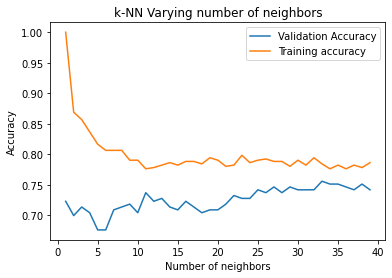

In [53]:
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, val_accuracy, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [58]:
print("max_neighbors :",val_accuracy.argmax())
print("max_accuracy :",max(val_accuracy))

max_neighbors : 32
max_accuracy : 0.755868544600939


##### 표준화 ver. (K=18, accuracy=0.76)

In [49]:
neighbors = np.arange(1,40)
train_accuracy_std =np.empty(len(neighbors))
val_accuracy_std = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(X_train_std, y_train)

    train_accuracy_std[i] = knn.score(X_train_std, y_train)
    val_accuracy_std[i] = knn.score(X_val_std, y_val) 

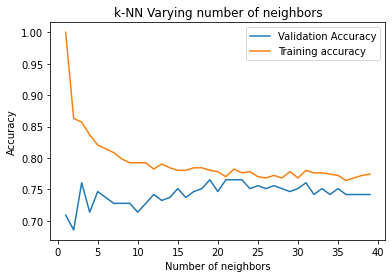

In [50]:
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, val_accuracy_std, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy_std, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [59]:
print("max_neighbors_std :",val_accuracy_std.argmax())
print("max_accuracy_std :",max(val_accuracy_std))

max_neighbors_std : 18
max_accuracy_std : 0.7652582159624414
